In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
%matplotlib inline

In [3]:
for_sale_path = "For_Sale_Inventory.csv"
median_list_path = "Median_List_Price.csv"
median_sale_path = "Median_Sale_Price.csv"

for_sale_inventory_df = pd.read_csv(for_sale_path)
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

Housing Inventory: How has the housing inventory fluctuated since pre-pandemic times?

In [4]:
# Create a DataFrame that focuses on our five cities/states 
complete_housing_inventory = for_sale_inventory_df.iloc[[1,2,3,29,58]]
complete_housing_inventory

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,60262.0,58241.0,55450.0,50400.0,45916.0,42796.0,43253.0,44197.0,45829.0,46180.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,22400.0,21802.0,20477.0,18604.0,16767.0,15382.0,15214.0,15103.0,15283.0,15364.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48984.0,...,31682.0,30798.0,28771.0,25674.0,22770.0,20829.0,20922.0,21214.0,22091.0,22700.0
29,394355,29,"Austin, TX",msa,TX,7392.0,8277.0,9243.0,9920.0,10287.0,...,12616.0,12433.0,11764.0,10703.0,9743.0,9093.0,9350.0,10007.0,11016.0,11759.0
58,394938,59,"Omaha, NE",msa,NE,3001.0,3167.0,3419.0,3638.0,3834.0,...,2242.0,2146.0,1980.0,1752.0,1543.0,1386.0,1446.0,1567.0,1748.0,1889.0


In [5]:
housing_dates = pd.to_datetime(pd.Series(complete_housing_inventory.columns[5:]), format="%Y-%m-%d").dt.strftime("%m-%Y")
housing_dates
# print(len(housing_dates))
# print(len(complete_housing_inventory))

0     03-2018
1     04-2018
2     05-2018
3     06-2018
4     07-2018
       ...   
59    02-2023
60    03-2023
61    04-2023
62    05-2023
63    06-2023
Length: 64, dtype: object

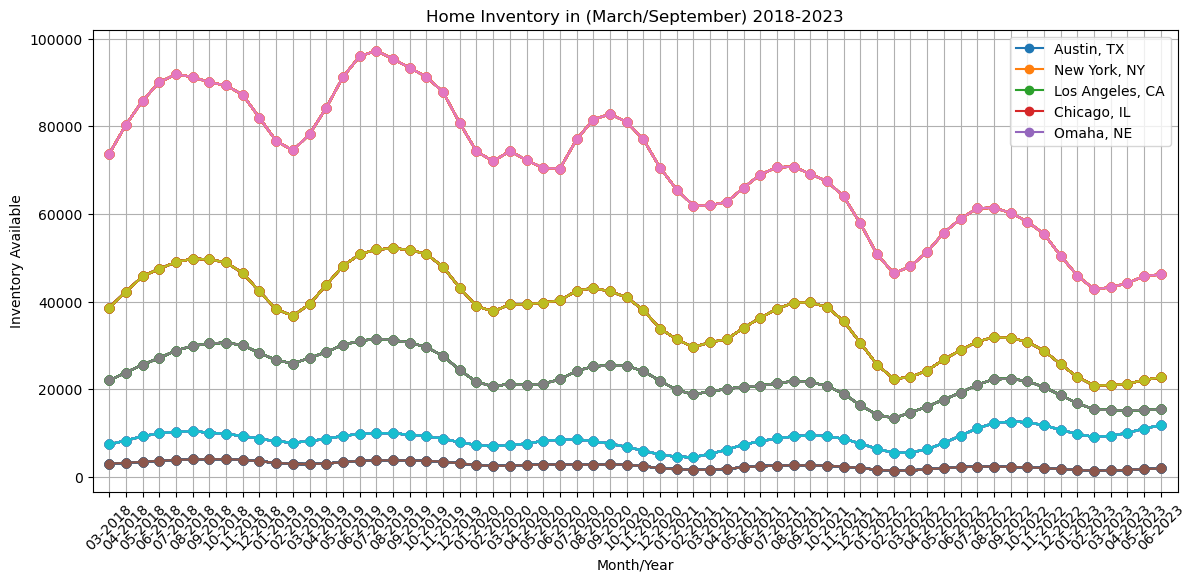

In [10]:
# Make a DataFrame using the loc function to find specific cities 
inventory_comparison = complete_housing_inventory.loc[(complete_housing_inventory["RegionName"] == "Austin, TX") |
                                             (complete_housing_inventory["RegionName"] == "Omaha, NE") |
                                             (complete_housing_inventory["RegionName"] == "Chicago, IL") |
                                             (complete_housing_inventory["RegionName"] == "New York, NY") |
                                             (complete_housing_inventory["RegionName"] == "Los Angeles, CA")
                                            ]

# Reset index to match the city and state we are analyzing 
inventory_comparison = inventory_comparison.set_index("RegionName")

# Find the row where each city is located 
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Omaha, NE"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "New York, NY"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Chicago, IL"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Los Angeles, CA"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Austin, TX"]

# Find the inventory over the five-year period for each city 
ny_ny_inventory = complete_housing_inventory.iloc[0,5:].to_list()
om_ne_inventory = complete_housing_inventory.iloc[3,5:].to_list()
ch_il_inventory = complete_housing_inventory.iloc[2,5:].to_list()
los_ca_inventory = complete_housing_inventory.iloc[1,5:].to_list()
au_tx_inventory = complete_housing_inventory.iloc[4,5:].to_list()

# Create a DataFrame that displays the housing inventory over a 5-year period for the five cities in the US
df = pd.DataFrame({
    "Austin, TX": au_tx_inventory,
    "New York, NY": ny_ny_inventory,
    "Los Angeles, CA": los_ca_inventory,
    "Chicago, IL": ch_il_inventory,
    "Omaha, NE": om_ne_inventory
}, index=housing_dates)

# Transpose the DataFrame to make dates as rows
df_transposed = df.T
df_transposed

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed


# Loop through the columns of inventory_comparison and plot each city's inventory data
for city in inventory_comparison.columns:
    plt.plot(housing_dates,df, marker='o', label=city)
     
# Set a Title and labels
plt.title("Home Inventory in (March/September) 2018-2023")
plt.xlabel("Month/Year")
plt.ylabel("Inventory Available")
plt.xlim(-1,64)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(df)

# Save our graph and show the graph
#plt.tight_layout()
plt.savefig("Output/Pandemic-Home-Inventory.png")
plt.show()

How has the Pandemic impacted Home Sale Prices from 2018-2023 and how have home prices changed since the beginning of the pandemic? Which city/cities saw the greatest rate of increase in price? 

In [31]:
def calculate_rate_of_increase(prices):
    return (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100



In [32]:
#city_groups = df.groupby('RegionName')['Price'].apply(calculate_rate_of_increase)

#List vs. Sold Listing prices that are currently available in the US?

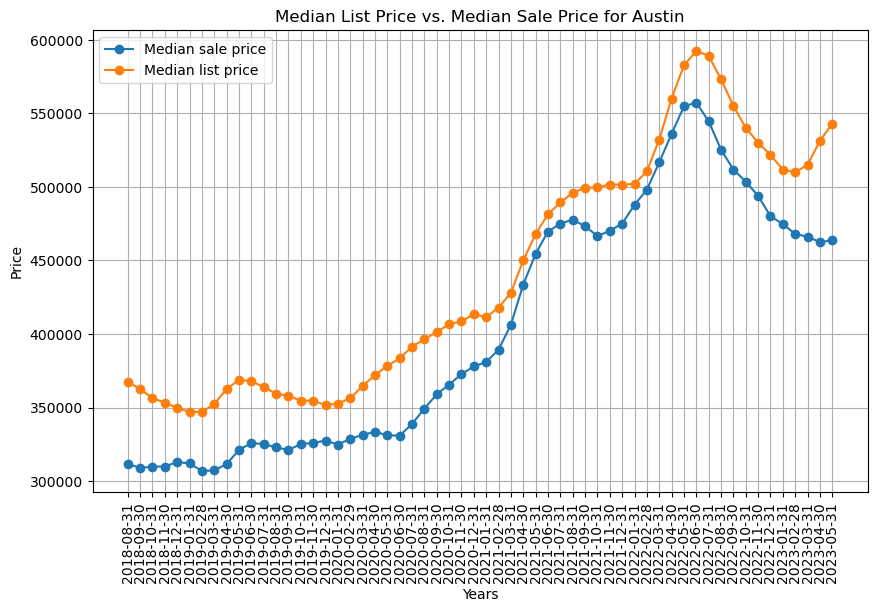

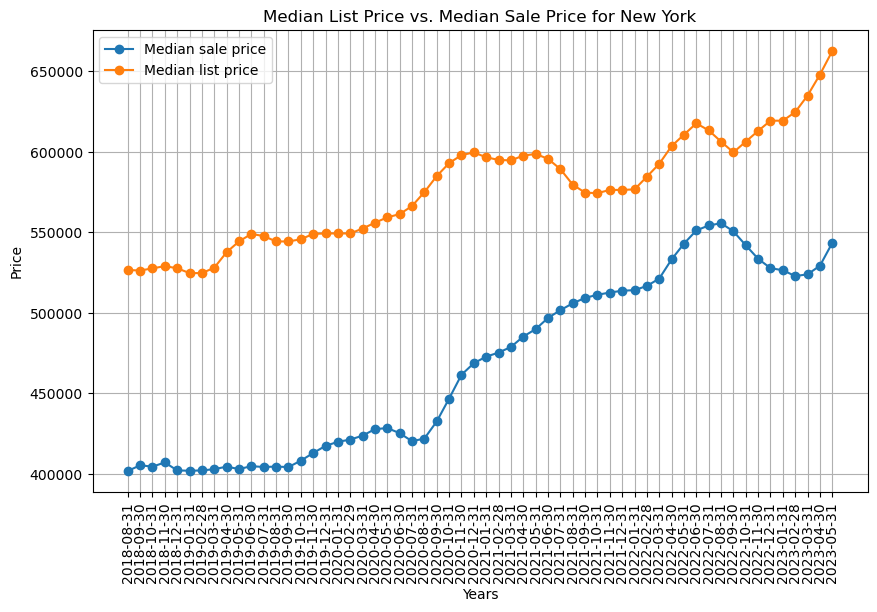

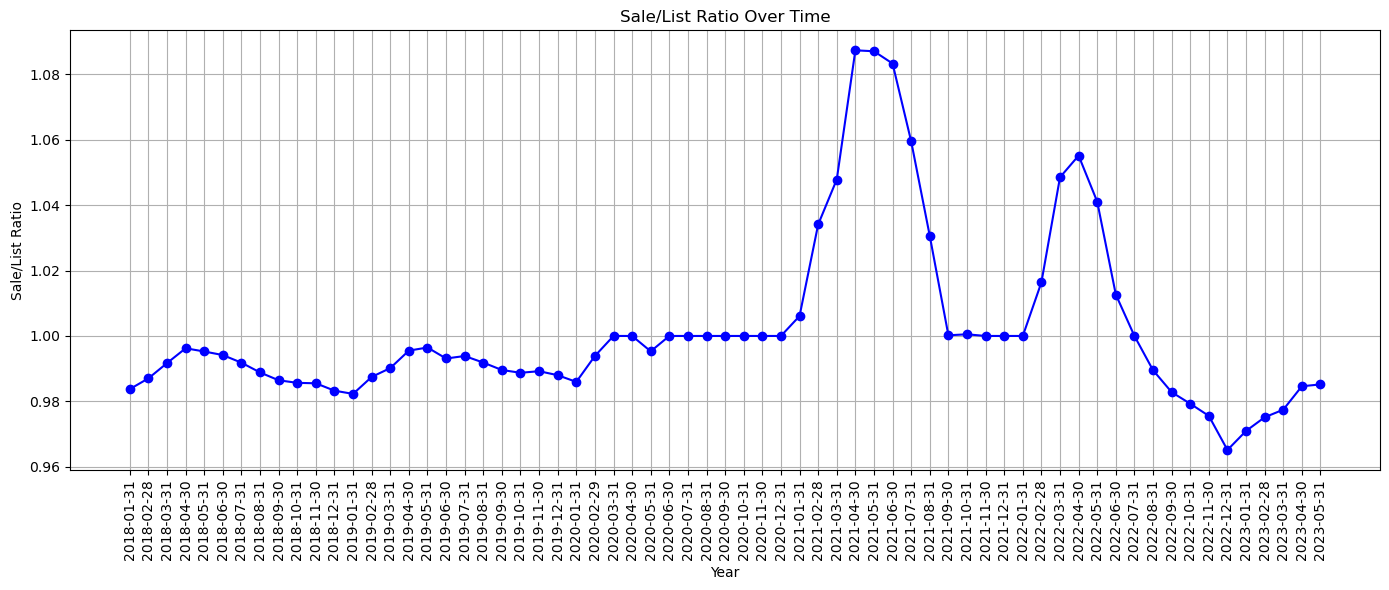

In [33]:
# Median Sale Price vs Median list price in Austin
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

# Assuming both DataFrames have the same RegionName or RegionID (common identifier)
region_name = "RegionName"

# Extract data for a specific region (e.g., "New York") - replace "New York" with the desired region
region_data_list_aus = median_list_path_df[median_list_path_df[region_name] == "Austin, TX"]
region_data_sale_aus = median_sale_path_df[median_sale_path_df[region_name] == "Austin, TX"]
clean= region_data_list_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean1=region_data_sale_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean_transposed=clean.T
clean1_transposed=clean1.T
clean_transposed.reset_index(inplace=True)
clean1_transposed.reset_index(inplace=True)
clean_transposed.columns = ["date", "median_list_price"]
clean1_transposed.columns = ["date", "median_sale_price"]
clean_data= pd.merge(clean1_transposed, clean_transposed, on="date", how="inner")
clean_data

# Plot the double line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(clean_data["date"], clean_data["median_sale_price"], label= "Median sale price", marker='o')
plt.plot(clean_data["date"], clean_data["median_list_price"], label= "Median list price", marker='o')

# Add labels, title, and legend
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Median List Price vs. Median Sale Price for Austin")
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()

# Median Sale Price vs Median list price in New York
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

# Assuming both DataFrames have the same RegionName or RegionID (common identifier)
region_name = "RegionName"

# Extract data for a specific region (e.g., "New York") - replace "New York" with the desired region
region_data_list_ny = median_list_path_df[median_list_path_df[region_name] == "New York, NY"]
region_data_sale_ny = median_sale_path_df[median_sale_path_df[region_name] == "New York, NY"]
clean_ny = region_data_list_ny.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean1_ny=region_data_sale_ny.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean_ny_transposed=clean_ny.T
clean1_ny_transposed=clean1_ny.T
clean_ny_transposed.reset_index(inplace=True)
clean1_ny_transposed.reset_index(inplace=True)
clean_ny_transposed.columns = ["date", "median_list_price"]
clean1_ny_transposed.columns = ["date", "median_sale_price"]
clean_ny_data= pd.merge(clean1_ny_transposed, clean_ny_transposed, on="date", how="inner")
clean_ny_data

# Plot the double line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(clean_ny_data["date"], clean_ny_data["median_sale_price"], label= "Median sale price", marker='o')
plt.plot(clean_ny_data["date"], clean_ny_data["median_list_price"], label= "Median list price", marker='o')

# Add labels, title, and legend
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Median List Price vs. Median Sale Price for New York")
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()

#using list to sale ratio
median_sale_to_list_path = "Median_Sale_to_list.csv"
median_sale_path = "median_sale_price.csv"

#for_sale_inventory_df = pd.read_csv(for_sale_path)
median_sale_to_list_df = pd.read_csv(median_sale_to_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)
median_sale_to_list_austin=median_sale_to_list_df[median_sale_to_list_df["RegionName"]=="Austin, TX"]
clean_ratio= median_sale_to_list_austin.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])

# Transpose the DataFrame to make dates as rows
clean_transposed_ratio = clean_ratio.T

# Reset the index to move the dates from the column names to a proper "date" column
clean_transposed_ratio.reset_index(inplace=True)

# Rename the columns for better readability
clean_transposed_ratio.columns = ["date", "sale_list_ratio"]

#clean_transposed["year"]= pd.to_datetime(clean_transposed["date"]).dt.year
#clean_transposed["month"]= pd.to_datetime(clean_transposed["date"]).dt.month
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed

#plt.plot(clean_transposed["year"], clean_transposed["sale_list_ratio"], marker='o', color='b')
plt.plot(clean_transposed_ratio["date"], clean_transposed_ratio["sale_list_ratio"], marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Sale/List Ratio")
plt.title("Sale/List Ratio Over Time")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [34]:
# Where are the most affordable places to live in the United States in 2023 based on median price?

In [35]:
#Independent T-test of list & sale home prices for Austin city
# Median Sale Price vs Median list price in Austin
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

# Assuming both DataFrames have the same RegionName or RegionID (common identifier)
region_name = "RegionName"

# Extract data for a specific region (e.g., "New York") - replace "New York" with the desired region
region_data_list_aus = median_list_path_df[median_list_path_df[region_name] == "Austin, TX"]
region_data_sale_aus = median_sale_path_df[median_sale_path_df[region_name] == "Austin, TX"]
clean_regress= region_data_list_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean1_regress=region_data_sale_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean_regress_transposed=clean_regress.T
clean1_regress_transposed=clean1_regress.T
clean_regress_transposed.reset_index(inplace=True)
clean1_regress_transposed.reset_index(inplace=True)
clean_regress_transposed.columns = ["date", "median_list_price"]
clean1_regress_transposed.columns = ["date", "median_sale_price"]

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(clean_regress_transposed["median_list_price"], clean1_regress_transposed["median_sale_price"])

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.1838707560989663
P-value: 0.030916894481670353


In [39]:
# Median Sale Price vs Median list price in Austin
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

# Assuming both DataFrames have the same RegionName or RegionID (common identifier)
region_name = "RegionName"

# Extract data for a specific region (e.g., "New York") - replace "New York" with the desired region
region_data_list_aus = median_list_path_df[median_list_path_df[region_name] == "Austin, TX"]
region_data_sale_aus = median_sale_path_df[median_sale_path_df[region_name] == "Austin, TX"]
clean_regress= region_data_list_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean1_regress=region_data_sale_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean_regress_transposed=clean_regress.T
clean1_regress_transposed=clean1_regress.T
clean_regress_transposed.reset_index(inplace=True)
clean1_regress_transposed.reset_index(inplace=True)
clean_regress_transposed.columns = ["date", "median_list_price"]
clean1_regress_transposed.columns = ["date", "median_sale_price"]

#-------------------
# calculating Coefficient for Median list price
clean_regress_transposed['date'] = pd.to_datetime(clean_regress_transposed['date'])
# Extract year and month from the 'date' column
clean_regress_transposed['Year'] = clean_regress_transposed['date'].dt.year
clean_regress_transposed['Month'] = clean_regress_transposed['date'].dt.month

# # Drop the original 'date' column
# clean_regress_transposed.drop(columns=['date'], inplace=True)
# Prepare the data for regression
X_list = clean_regress_transposed[["Year", "Month"]]
Y_list = clean_regress_transposed["median_list_price"]

# Create and fit the linear regression model for median list price data
reg_model_list= LinearRegression()
reg_model_list.fit(X_list, Y_list)

# Get the coefficients and intercept of the regression line for median list price data
coefficients_list = reg_model_list.coef_
intercept_list = reg_model_list.intercept_
print("Coefficient (Median list price):", coefficients_list[0])
print("Intercept (Median list price):", intercept_list)

#-----------------------------------------------------------------------
# calculating Coefficient for Median Sale price
clean1_regress_transposed['date'] = pd.to_datetime(clean1_regress_transposed['date'])
# Extract year and month from the 'date' column
clean1_regress_transposed['Year'] = clean1_regress_transposed['date'].dt.year
clean1_regress_transposed['Month'] = clean1_regress_transposed['date'].dt.month

# Prepare the data for regression
X_list_sale = clean1_regress_transposed[["Year", "Month"]]
Y_list_sale = clean1_regress_transposed["median_sale_price"]

# Create and fit the linear regression model for median list price data
reg_model_list_sale= LinearRegression()
reg_model_list_sale.fit(X_list_sale, Y_list_sale)

# Get the coefficients and intercept of the regression line for median list price data
coefficients_list_sale= reg_model_list_sale.coef_
intercept_list_sale = reg_model_list_sale.intercept_
print("Coefficient (Median Sale price):", coefficients_list_sale[0])
print("Intercept (Median Sale price):", intercept_list_sale )

Coefficient (Median list price): 47117.97287878785
Intercept (Median list price): -94786932.4207007
Coefficient (Median Sale price): 53992.27896581948
Intercept (Median Sale price): -108723000.07454446
